"""
This is just a rough skeleton to assist you in understanding the process flow. 
Modify it to meet the requirements of the questions. 

Put the description paragraph here
DESCRIPTION OF IMPLEMENTATION:

Firstly, to prepare the data, I shuffled the index of the data, then used this index to shuffle the data. 
Then partition them into equal k=5 folds.
And, save them into the dictionary X_shuffled and y_shuffled respectively.

Then set itr as the parameter that the key whose value will be chosed for the valid data, and the leftover will be the train data.
Where I used the "pop" function to seperate the valid data and the train data and use "np.concatenate" to connection the separated 
train data.

Secondly, in order to train the data, I used the formula derived in the Problem 2 which is the loglikelihood of logistic function,
besides, I also use the cost function to get the gradient which will be used in the gradient descent.

In the gradient descent process, alpha is the learning rate hyperparameter. And I set the convergence desicion boundary is the norm of w(t+1)-w(t) is less than 0.0001, and the iteration time is less than 2000.

To valid this method, I uses the X_valid times coefficient matrix to get the y_predict.

Finally, for every alpha, we train the dataset and valid the methon 5 times, and get 5 error rate, I use their mean value 
as the final errorate for this alpha method.

Choose different lambda and get different error rate. Plot error rate vs alpha.


"""

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [96]:
# For reading the data you can use either numpy or pandas and accordingly handle your processing. An example could be
# my_data = np.genfromtxt('SPAM-HW1.csv', delimiter=',')
    

In [97]:
np.random.seed(2)
features=pd.read_csv("IRISFeat.csv")# in this way the data will be dataframe
labels=pd.read_csv("IRISlabel.csv")
n=len(features)
k=features.shape[1]
f=5

#shuffle the data
shuffled_index=np.random.permutation(n)
features_shuffled=features.iloc[shuffled_index]
labels_shuffled=labels.iloc[shuffled_index]

#partition them into equal 5 folds
fea=[]
for i in range(1,f+1):
    fold=features_shuffled.iloc[(i-1)*(int(n/f)):i*(int(n/f)),:]
    fea.append(fold)

lab=[]
for j in range(1,f+1):
    fold=labels_shuffled.iloc[(j-1)*(int(n/f)):j*(int(n/f)),:]
    lab.append(fold)

#Save each of the 5 folds into dictionary X_shuffled and y_shuffled
X_shuffled={1:fea[0],2:fea[1],3:fea[2],4:fea[3],5:fea[4]}
y_shuffled={1:lab[0],2:lab[1],3:lab[2],4:lab[3],5:lab[4]}

In [98]:
def get_next_train_valid(X_shuffled, y_shuffled, itr):
    """
    - itr value can tell you which fold you pick up for valid and rest go to training
    - use 1 fold for validation and all other folds for training
    - in next iteration, use a different fold for validation and remaining folds for training
        
    Basically, here you will determine which fold goes for validation and which ones for training
    """
    #return training and validation data
    
    #get the valid data
    X_valid=X_shuffled[itr]
    #design the X_valid matrix: adding a row of 1 which will times the intercept
    X_valid=np.concatenate((np.ones((int(n/f),1)),X_valid),axis = 1)
    y_valid=y_shuffled[itr]
    
    #get the shuffled data
    Xcopy=X_shuffled.copy()
    ycopy=y_shuffled.copy()
    Xcopy.pop(itr)
    ycopy.pop(itr)
    Xtrain=Xcopy
    ytrain=ycopy
    #get X_train
    X_train=np.zeros((1,k))
    for key in Xtrain:
        X_train=np.concatenate((X_train,Xtrain[key]),axis = 0)
    
    X_train=np.delete(X_train,0,axis = 0)
    X_train=np.concatenate((np.ones(((n-int(n/f)),1)),X_train),axis = 1)
    
    #get y_train
    y_train=np.zeros((1,1))
    for key in ytrain:
        y_train=np.concatenate((y_train,ytrain[key]),axis = 0)
    
    y_train=np.delete(y_train,0,axis = 0)
    
    return(X_train,y_train,X_valid,y_valid)

In [99]:
def derivitiveF(X_train, y_train, w):
    """
    Define the gradient, the devitation has been derived in the Problem 2 and I also use the cost function.
    """
    log=1/(1+np.exp(-np.dot(X_train,w)))
    grad=(1/(n-(n/f)))*(np.dot(X_train.T,log-y_train))
    
    return(grad)

In [100]:
def train(X_train, y_train,alpha):
    """
    This function uses gradient descent to get the coefficient matrix. 
    alpha: learning rate
    """
    sita=np.random.randn(k+1,1)
    stia=np.ones((k+1,1))
    # return model
    i=0
    while (np.linalg.norm(stia-sita)>0.0001) and i<=2000:
        stia=sita
        deriv=derivitiveF(X_train, y_train, stia)
        sita=stia-alpha*deriv
        i+=1
        
    return(sita)

In [101]:
def predict(X_valid, sita):
    """
    Here, using the trained model, implement how to predict when you just have feature vector. 
    """
    # return 
    #return (1*(1/(1+np.exp(-np.dot(X_valid,sita)))))
    return 1*((1/(1+np.exp(-np.dot(X_valid,sita))))>0.5)

In [102]:
def errorate(alpha):
    """
    Use all the functions above: get the train data and valid data; use gradient descent to get the coefficient matrix;
    then let the X_valid times coefficient matrix to get y_predict. Finally, for every learning rate alpha , we have 5 
    train datasets and 5 valid datasets, then we can get 5 error rate by counting the numbers of wrong prediction and letting 
    them divided by the whole numbers of the valid data. Take their mean value as the error rate as this learning rate method.
    """
    er=np.zeros((f))
    for i in range(1,f+1):
        X_train,y_train,X_valid,y_valid=get_next_train_valid(X_shuffled, y_shuffled, i)
        ww=train(X_train, y_train,alpha)
        y_predict=predict(X_valid, ww)
        k=np.sum(np.absolute(y_predict-y_valid))
        er[i-1]=k/(n/f)
        
    errorate=np.mean(er)
        
    return(errorate)     

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08]
[0.01333333 0.00666667 0.00666667 0.00666667 0.00666667 0.00666667
 0.00666667 0.00666667]


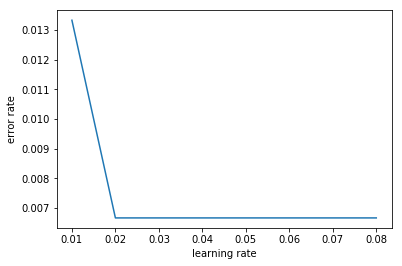

In [110]:
r=10
alpha=np.zeros((r))
err=np.zeros((r))
for j in range(0,r):
    alpha[j]=j
    err[j]=errorate(0.01*j)
    
plt.plot(0.01*alpha[1:9],err[1:9])
print(0.01*alpha[1:9])
print(err[1:9])
plt.xlabel('learning rate'); 
plt.ylabel('error rate'); 
plt.show()    

"""
The reason that I chose the learning rate is that I have chose larger number like 0.5 and smaller number like 0.001, the error rates for those method are much larger than the error rate when the learning rate is 0.01. So, I try fix learning rate in the 0.01 magnitude. And find that when learning rate is 0.01 or 0.02, the error rate will change between 0.013 and 0.02. But, when learning rate is 0.02, 0.03, 0.04, ....0.09, the learning rate is fixed at 0.00666666666.
"""

In [ ]:
"""
Main - Here goes the overall logic.
"""
# cross-validation to get train and validation data
# We will use cross validation for training and validation. In this assignment, we will not use test split separately.
#  Let us say we want k-fold with k=5 - shuffle the data and partition into k-equal partitions
#  Save paritions into dictionaries

#Loop through 5 times, each time selecting 1 fold as validation and remaining as train data sets using function get_next_train_valid 
#   train your model
#   predict target on validation and training
#   compute error i.e. RMSE or classification accuracy as per assignment question
#
#Plot or print as per question - Mean RMSE or accuracy